In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ev_df = pd.read_csv("behavioural_dataset.csv")
ev_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [3]:
ev_df.isna().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [4]:
ev_df.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
Total Salary         int64
Price                int64
dtype: object

In [5]:
# One-hot encode the dataset without separating the columns for "Yes" and "No"
ev_df_encoded_combined = pd.get_dummies(ev_df, dtype=float, drop_first=True)
ev_df_encoded_combined.head()

,Age,No of Dependents,Total Salary,Price,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes
0,27,0,800000,800000,1.0,1.0,1.0,1.0
1,35,2,2000000,1000000,1.0,0.0,1.0,1.0
2,45,4,1800000,1200000,0.0,0.0,0.0,1.0
3,41,3,2200000,1200000,0.0,0.0,1.0,0.0
4,31,2,2600000,1600000,1.0,0.0,1.0,1.0


In [6]:
ev_df_encoded_combined.shape

(99, 8)

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Scale = StandardScaler()
Scale.fit(ev_df_encoded_combined)
ev_df_encoded_combined_scaled = Scale.transform(ev_df_encoded_combined)

pca = PCA()
pca.fit(ev_df_encoded_combined_scaled)
x = pca.transform(ev_df_encoded_combined_scaled)
x.shape

(99, 8)

In [8]:
# Summary of PCA
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
standard_deviation = np.sqrt(pca.explained_variance_)

summary_df = pd.DataFrame(
    {
        "Standard Deviation": standard_deviation,
        "Proportion of Variance": explained_variance,
        "Cumulative Proportion": cumulative_variance,
    }
)

print(summary_df)

   Standard Deviation  Proportion of Variance  Cumulative Proportion
0            1.673480                0.346531               0.346531
1            1.245957                0.192091               0.538622
2            1.076239                0.143324               0.681946
3            0.954883                0.112824               0.794770
4            0.844415                0.088229               0.882999
5            0.628961                0.048950               0.931948
6            0.603903                0.045127               0.977075
7            0.430429                0.022925               1.000000


In [9]:
# Print the PCA summary with 1 digit precision
print(summary_df.round(1))

   Standard Deviation  Proportion of Variance  Cumulative Proportion
0                 1.7                     0.3                    0.3
1                 1.2                     0.2                    0.5
2                 1.1                     0.1                    0.7
3                 1.0                     0.1                    0.8
4                 0.8                     0.1                    0.9
5                 0.6                     0.0                    0.9
6                 0.6                     0.0                    1.0
7                 0.4                     0.0                    1.0


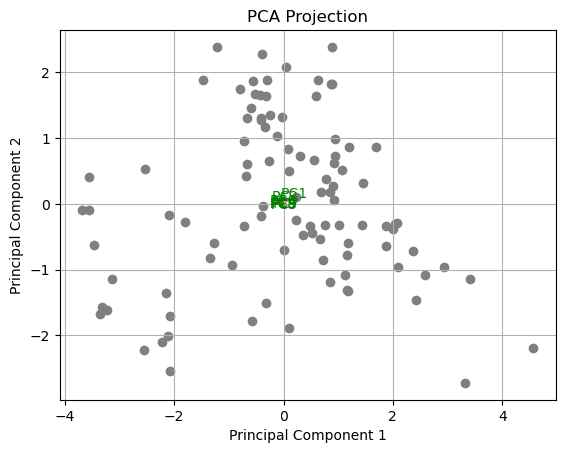

In [10]:
plt.scatter(x[:, 0], x[:, 1], c="grey")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")

# Projecting the axes
for i, (comp, var) in enumerate(zip(pca.components_, explained_variance)):
    plt.arrow(0, 0, comp[0] * var, comp[1] * var, color="r", alpha=0.5)
    plt.text(
        comp[0] * var * 1.15,
        comp[1] * var * 1.15,
        f"PC{i+1}",
        color="g",
        ha="center",
        va="center",
    )

plt.grid()
plt.show()

c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


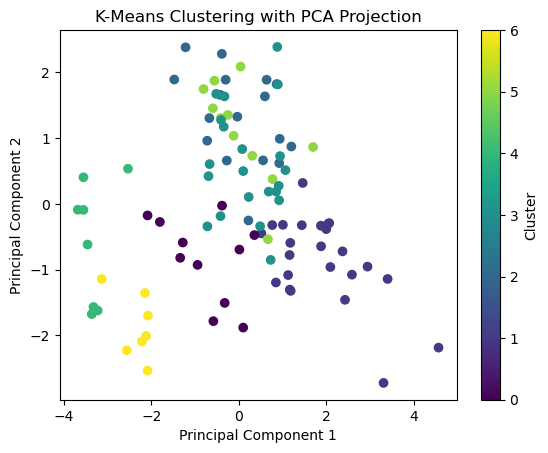

In [11]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 7

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(ev_df_encoded_combined_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataframe
ev_df["Cluster"] = cluster_labels

# Visualize the clusters
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering with PCA Projection")
plt.colorbar(label="Cluster")
plt.show()

c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:14

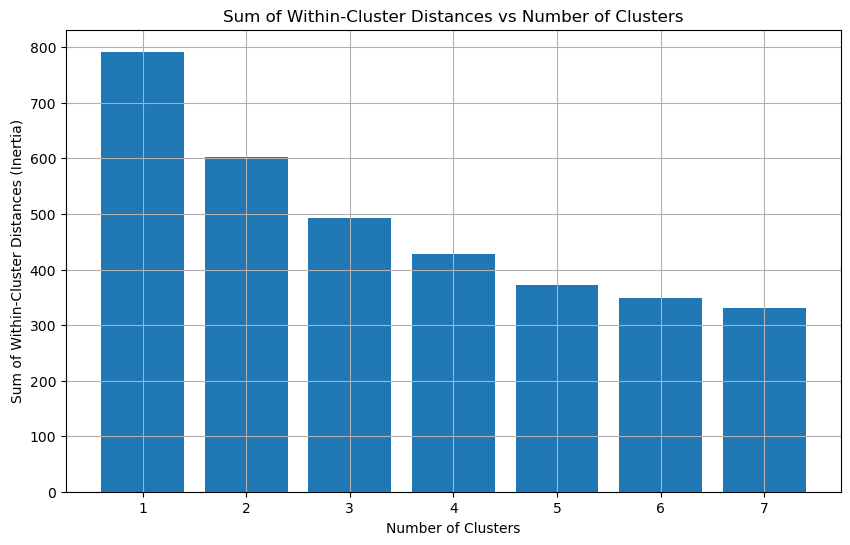

In [12]:
# Define the range for the number of clusters
cluster_range = range(1, 8)

# Initialize a list to store the sum of within-cluster distances for each number of clusters
inertia_values = []

# Loop over the range of cluster numbers
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(ev_df_encoded_combined_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the sum of within-cluster distances vs number of clusters as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(cluster_range, inertia_values)
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Within-Cluster Distances (Inertia)")
plt.title("Sum of Within-Cluster Distances vs Number of Clusters")
plt.grid(True)
plt.show()

c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:14

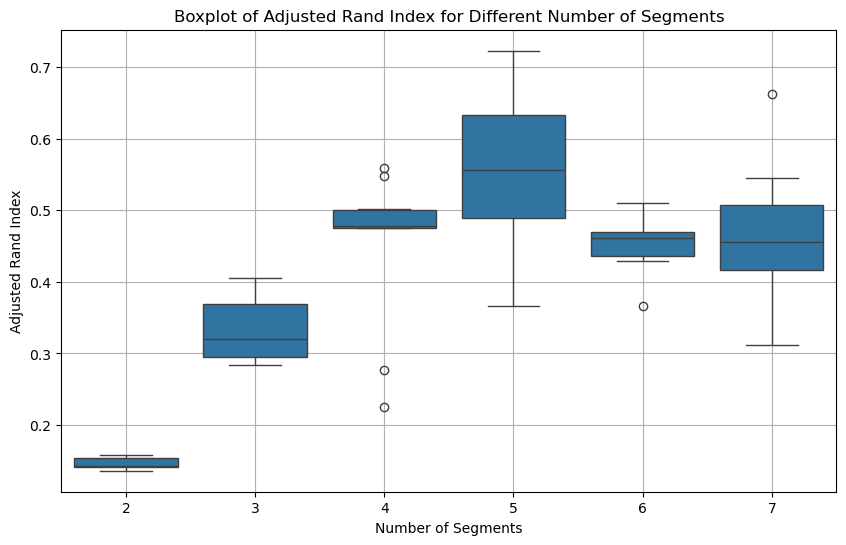

In [13]:
np.random.seed(42)
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Assume ev_df is your original DataFrame and ev_df_encoded_combined_scaled is the scaled features

# Define the range of clusters
cluster_range = range(2, 8)  # Example range from 2 to 10

# Store ARI scores for each number of clusters
ari_scores_dict = {num_clusters: [] for num_clusters in cluster_range}

# Run KMeans and calculate ARI multiple times
for num_clusters in cluster_range:
    for _ in range(10):  # Run multiple times to get a distribution
        kmeans = KMeans(n_clusters=num_clusters, random_state=np.random.randint(1000))
        kmeans.fit(ev_df_encoded_combined_scaled)
        labels = kmeans.labels_
        ari = adjusted_rand_score(ev_df["Cluster"], labels)
        ari_scores_dict[num_clusters].append(ari)

# Create a DataFrame to store the results
ari_df = pd.DataFrame.from_dict(ari_scores_dict, orient="index").T
ari_df = ari_df.melt(var_name="Number of Segments", value_name="Adjusted Rand Index")

# Create a boxplot for Adjusted Rand Index
plt.figure(figsize=(10, 6))
sns.boxplot(x="Number of Segments", y="Adjusted Rand Index", data=ari_df)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Boxplot of Adjusted Rand Index for Different Number of Segments")
plt.grid(True)
plt.show()

In [14]:
# Determine the optimal number of segments to choose based on the highest median ARI
median_ari_scores = ari_df.groupby("Number of Segments")["Adjusted Rand Index"].median()
optimal_segments = median_ari_scores.idxmax()
print(f"The optimal number of segments to choose is: {optimal_segments}")

The optimal number of segments to choose is: 5


In [15]:
print(median_ari_scores)

Number of Segments
2    0.142603
3    0.319885
4    0.477848
5    0.555983
6    0.460948
7    0.455961
Name: Adjusted Rand Index, dtype: float64


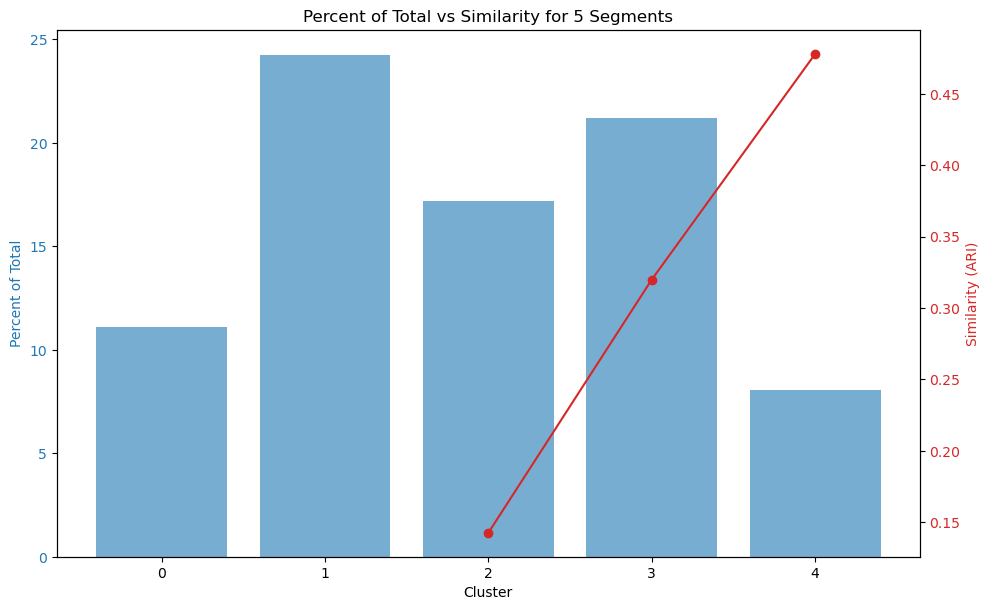

In [16]:
# Calculate the percentage of total for each cluster
cluster_counts = ev_df["Cluster"].value_counts()
percent_total = (cluster_counts / cluster_counts.sum()) * 100

# Calculate the similarity (Adjusted Rand Index) for each cluster
similarity = ari_df.groupby("Number of Segments")["Adjusted Rand Index"].median()

# Filter for the 5-segment data
percent_total_5_segments = percent_total[percent_total.index < 5]
similarity_5_segments = similarity[similarity.index < 5]

# Plot the gorge plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = "tab:blue"
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Percent of Total", color=color)
ax1.bar(
    percent_total_5_segments.index,
    percent_total_5_segments.values,
    color=color,
    alpha=0.6,
)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Similarity (ARI)", color=color)
ax2.plot(
    similarity_5_segments.index, similarity_5_segments.values, color=color, marker="o"
)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("Percent of Total vs Similarity for 5 Segments")
plt.show()

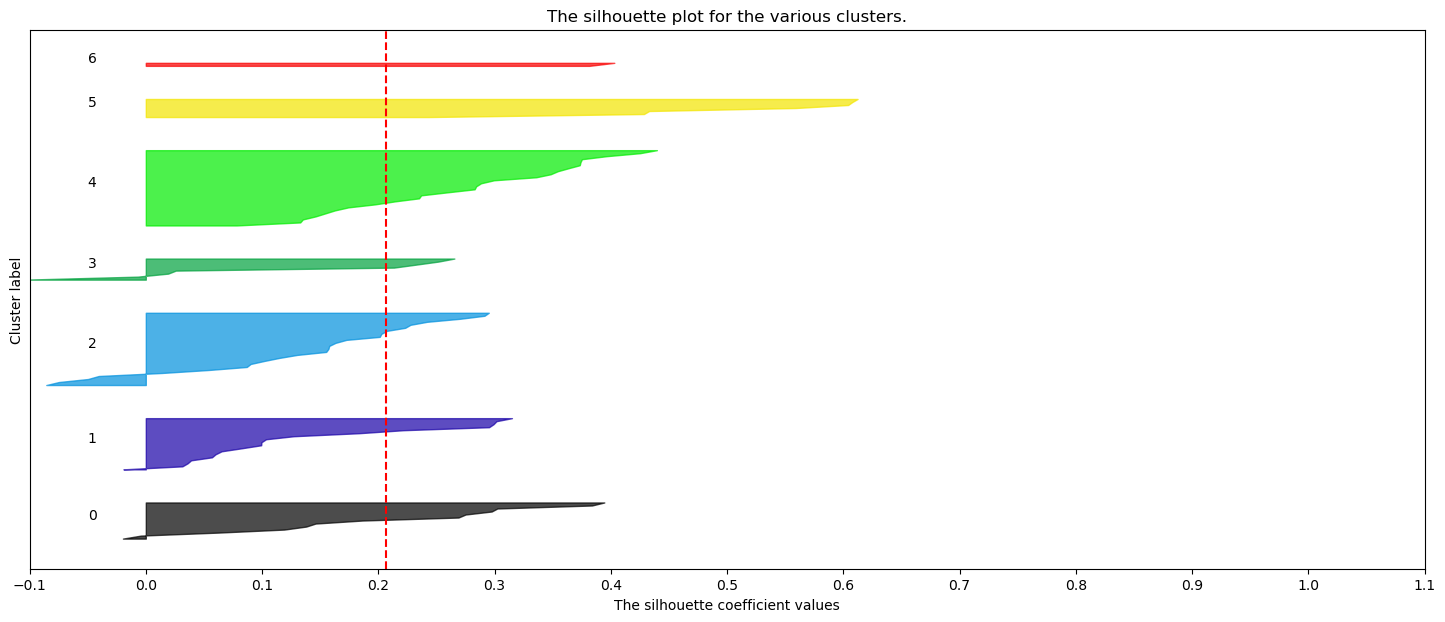

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming 'kmeans' is your KMeans model and 'ev_df_encoded_combined_scaled' is your scaled data
cluster_labels = kmeans.labels_
n_clusters = kmeans.n_clusters

# Compute the silhouette scores for each sample
silhouette_avg = silhouette_score(ev_df_encoded_combined_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(
    ev_df_encoded_combined_scaled, cluster_labels
)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(ev_df_encoded_combined_scaled) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))

plt.show()

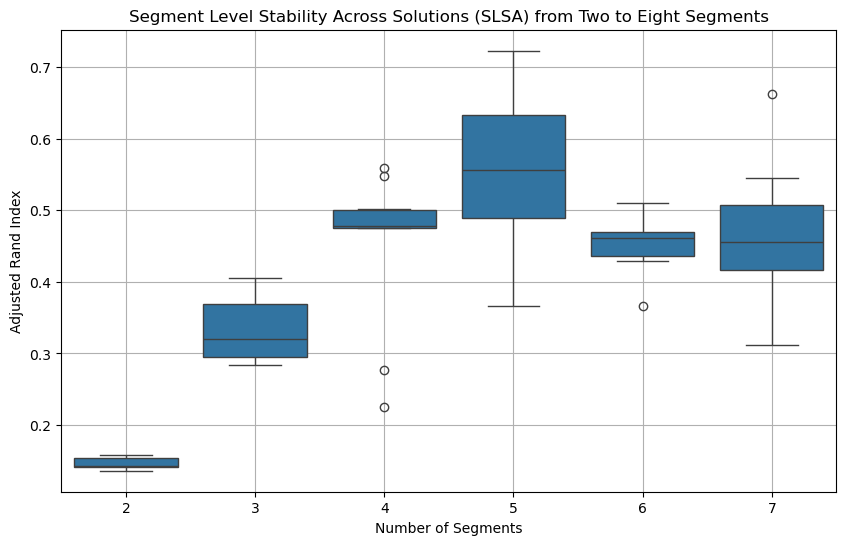

In [18]:
# Create a DataFrame to store the ARI scores for each segment
slsa_df = pd.DataFrame.from_dict(ari_scores_dict, orient="index").T
slsa_df = slsa_df.melt(var_name="Number of Segments", value_name="Adjusted Rand Index")

# Create a boxplot for Segment Level Stability Across Solutions (SLSA)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Number of Segments", y="Adjusted Rand Index", data=slsa_df)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Segment Level Stability Across Solutions (SLSA) from Two to Eight Segments")
plt.grid(True)
plt.show()

Here the segment 5 is most stable

c:\Users\ameyj\miniconda3\envs\feynnlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


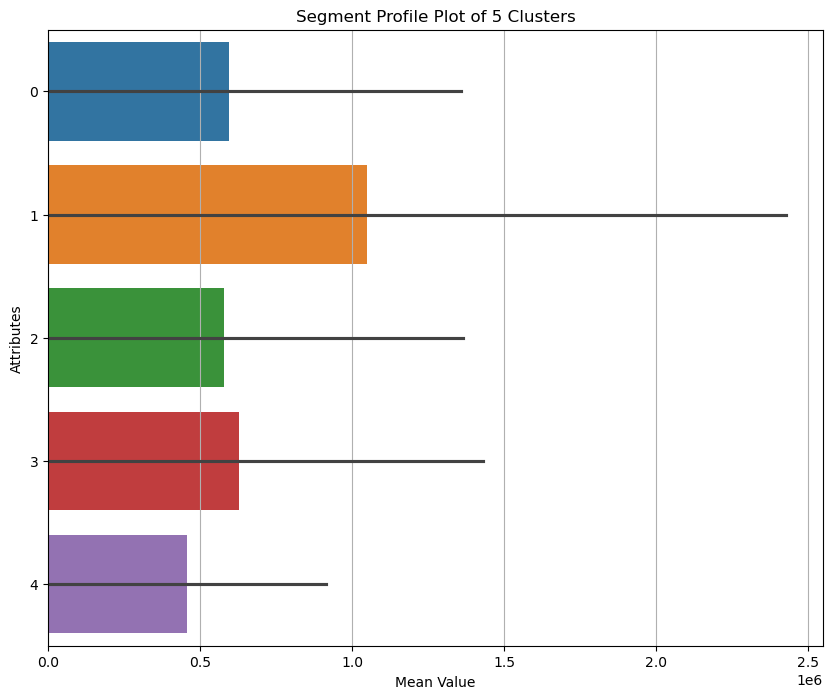

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
import seaborn as sns

# Assuming 'ev_df' is your DataFrame and 'ev_df_encoded_combined_scaled' contains the scaled features

# Fit KMeans for 5 segments
kmeans = KMeans(n_clusters=5, random_state=42)
ev_df["Cluster"] = kmeans.fit_predict(ev_df_encoded_combined_scaled)

# Ensure that we only use numeric columns for clustering
numeric_cols = ev_df.select_dtypes(include=[np.number]).columns

# Calculate the mean for each numeric attribute in each cluster
cluster_means = ev_df.groupby("Cluster")[numeric_cols].mean()

# Perform hierarchical clustering on the cluster means to order the attributes
Z = linkage(cluster_means, method="ward")

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
# Use seaborn to create a nicer plot
sns.barplot(data=cluster_means.T, orient="h")
plt.xlabel("Mean Value")
plt.ylabel("Attributes")
plt.title("Segment Profile Plot of 5 Clusters")
plt.grid(axis="x")
plt.show()

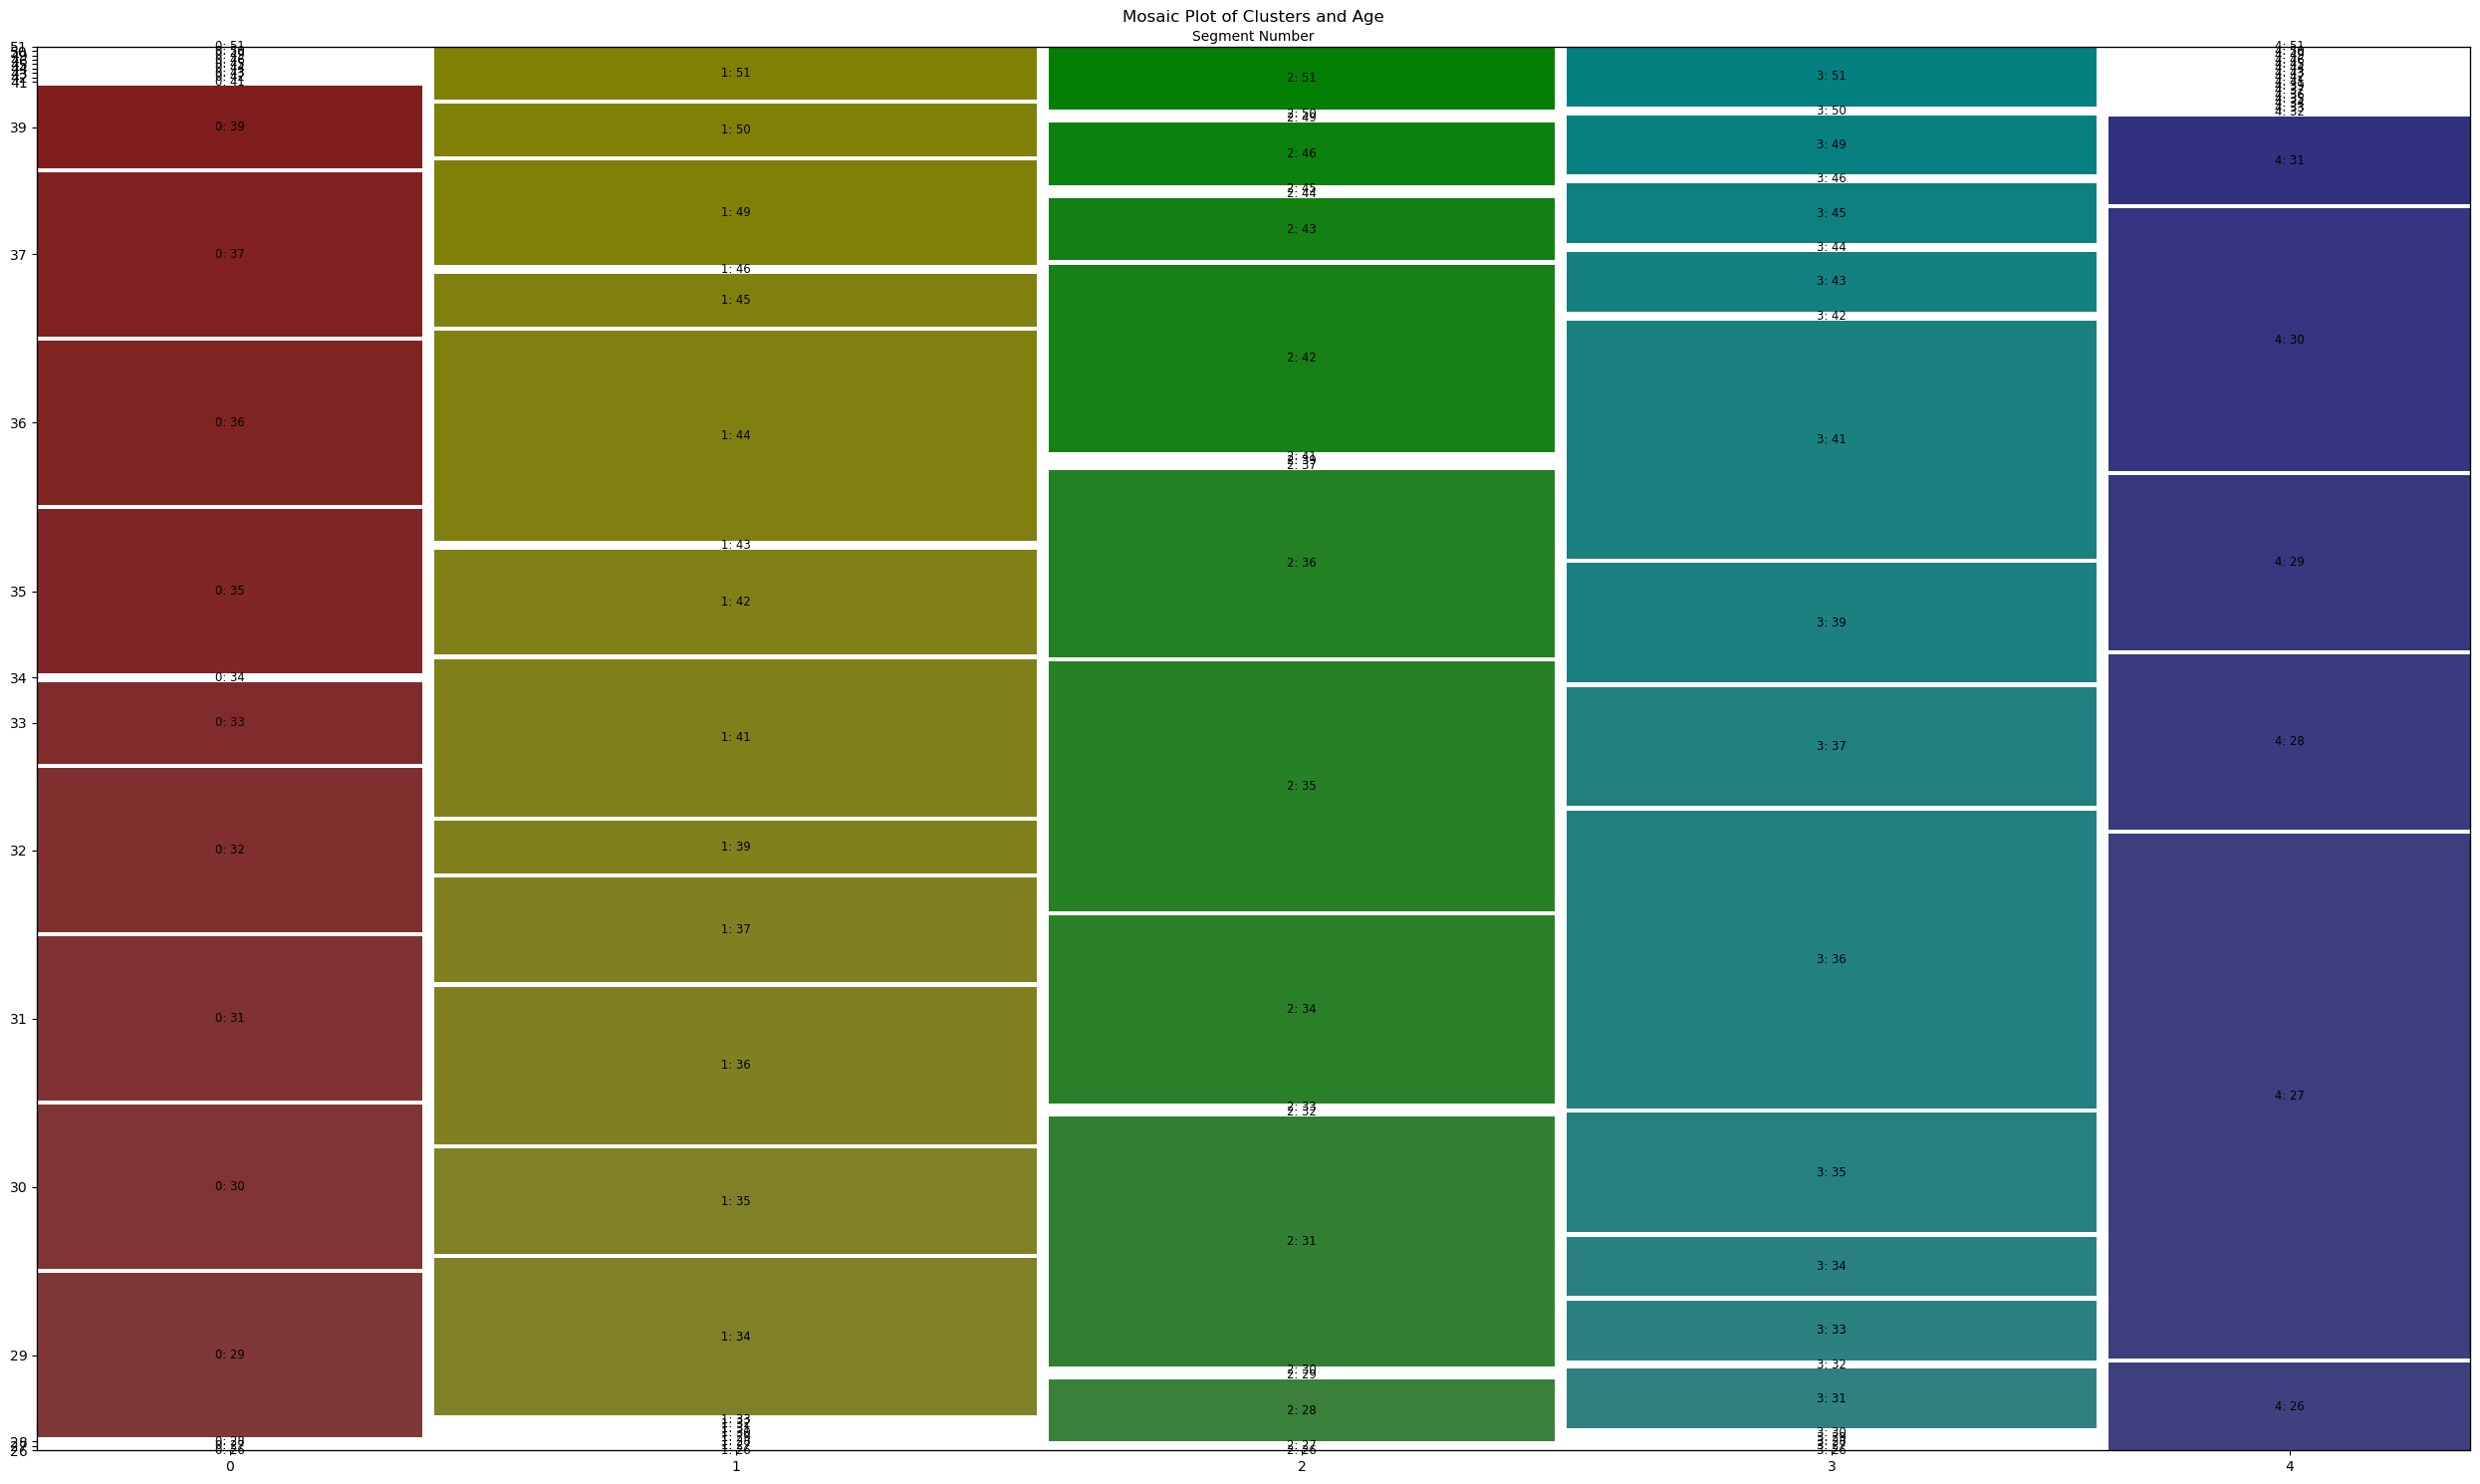

In [20]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Assuming 'ev_df' is your DataFrame and 'Cluster' is the cluster labels
# Create a contingency table
contingency_table = pd.crosstab(ev_df["Cluster"], ev_df["Age"])

# Create the mosaic plot with increased size
plt.figure(figsize=(25, 15))  # Increase the figure size further
mosaic(
    contingency_table.stack(),
    title="",
    labelizer=lambda x: f"{x[0]}: {x[1]}",
    ax=plt.gca(),
)

# Set axis labels
plt.xlabel("Segment Number")
plt.ylabel("Age Group")
plt.title("Mosaic Plot of Clusters and Age")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

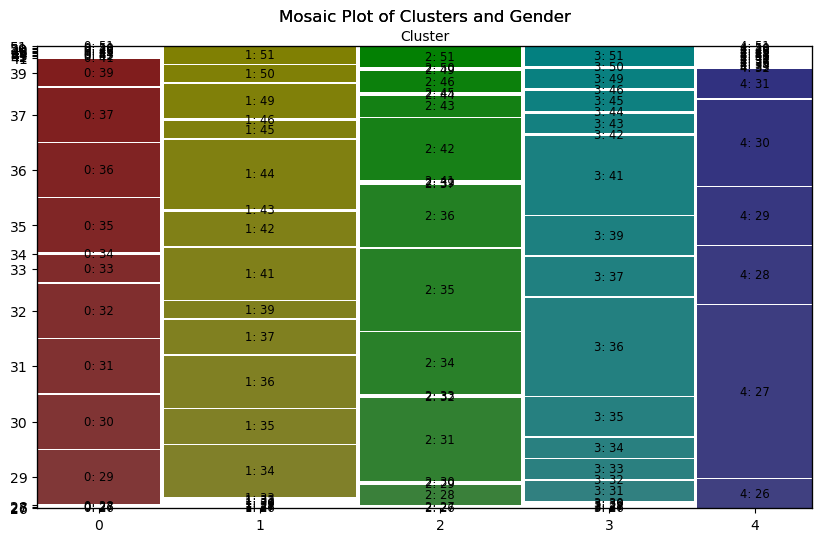

In [22]:
from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt

# Assuming 'ev_df' is your DataFrame and 'Cluster' is the cluster labels
# Create a contingency table for Cluster and Gender
contingency_table_gender = pd.crosstab(ev_df["Cluster"], ev_df["Age"])

# Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(
    contingency_table_gender.stack(),
    title="Mosaic Plot of Clusters and Gender",
    labelizer=lambda k: f"{k[0]}: {k[1]}",
    ax=plt.gca(),
)

# Set axis labels
plt.xlabel("Cluster")
plt.ylabel("Gender")
plt.title("Mosaic Plot of Clusters and Gender")
plt.show()

In [36]:
ev_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,4
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,2
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,3
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,3
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,2


In [61]:
# One-hot encode categorical columns
df_encoded_cluster = pd.get_dummies(
    ev_df,
    columns=["Profession", "Marrital Status", "Education", "Personal loan"],
    drop_first=True,
    dtype=float,
)

# Display the encoded DataFrame
df_encoded_cluster.head()

,Age,No of Dependents,Total Salary,Price,Cluster,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes
0,27,0,800000,800000,4,1.0,1.0,1.0,1.0
1,35,2,2000000,1000000,2,1.0,0.0,1.0,1.0
2,45,4,1800000,1200000,3,0.0,0.0,0.0,1.0
3,41,3,2200000,1200000,3,0.0,0.0,1.0,0.0
4,31,2,2600000,1600000,2,1.0,0.0,1.0,1.0


C:\Users\ameyj\AppData\Local\Temp\ipykernel_13988\1719145980.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


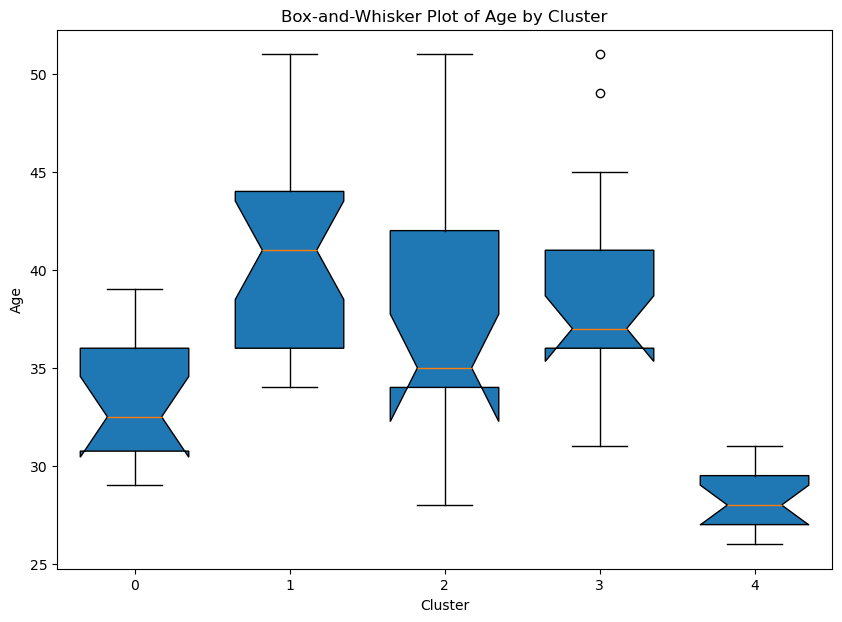

In [60]:
# Ensure you have a 'Cluster' column in your DataFrame
if "Cluster" not in df_encoded_cluster.columns:
    raise ValueError("The 'Cluster' column is missing from the DataFrame.")

# Create the boxplot using matplotlib
plt.figure(figsize=(10, 7))

# Create the boxplot
plt.boxplot(
    [
        df_encoded_cluster[df_encoded_cluster["Cluster"] == i]["Age"]
        for i in range(df_encoded_cluster["Cluster"].nunique())
    ],
    labels=[f"{i}" for i in range(df_encoded_cluster["Cluster"].nunique())],
    notch=True,
    widths=0.7,
    patch_artist=True,
)

# Customize the plot
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.title("Box-and-Whisker Plot of Age by Cluster")

# Show the plot
plt.show()

In [51]:
# Recalculate mean values by Cluster
income = df_encoded_cluster.groupby("Cluster")["Total Salary"].mean()
personal_loan = df_encoded_cluster.groupby("Cluster")["Personal loan_Yes"].mean()
price = df_encoded_cluster.groupby("Cluster")["Price"].mean()

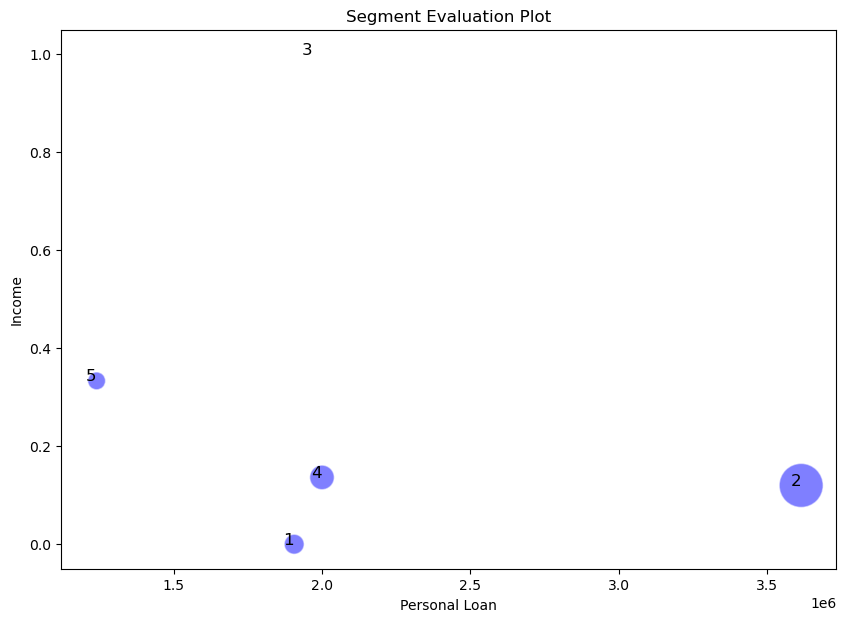

In [59]:
# Normalize or scale female values for bubble sizes
scaled_price = (price - price.min()) / (price.max() - price.min()) * 1000

# Create the plot
plt.figure(figsize=(10, 7))

# Scatter plot with scaled bubble sizes
plt.scatter(
    income, personal_loan, s=scaled_price, alpha=0.5, edgecolors="w", c="b", marker="o"
)

# Add text labels for each cluster
for i, cluster in enumerate(range(len(income))):
    plt.text(income[i], personal_loan[i], str(i + 1), fontsize=12, ha="right")

# Customize the plot
plt.xlabel("Personal Loan")
plt.ylabel("Income")
plt.title("Segment Evaluation Plot")

# Display the plot
plt.show()

Significance of Size: If segment 2 has larger bubbles, it indicates that this group has significantly higher price values. This could suggest that they are either higher-value customers or hold larger assets, making them an important target for financial products.

Market Insights: Financial institutions might analyze segment 2 further to tailor products that cater specifically to their needs, especially if they represent a lucrative customer segment with higher incomes and loan amounts.

Strategic Implications: Understanding that segment 2 is larger can influence marketing strategies, risk assessments, and product offerings tailored to their specific financial profiles.